In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
encoding = 'latin1'

In [3]:
cards = pd.read_csv('cards.csv', encoding=encoding)

In [4]:
cards.head()

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor,race,how_to_earn,how_to_earn_golden,targeting_arrow_text,faction,durability
0,KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,NaN,3.0,2.0,5.0,COMMON,NaN,NaN,BEAST,NaN,NaN,NaN,NaN,NaN
3,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,True,It's like putting racing stripes and a giant s...,NaN,NaN,NaN,NaN,NaN,NaN
4,OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,NaN,10.0,10.0,10.0,COMMON,True,"Rejected names: Forty-Foot Faceless, Big ol' N...",NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
cards.shape

(2819, 12)

In [5]:
unique_card_types = cards['type'].unique()
unique_card_types

array(['SPELL', 'MINION', 'ENCHANTMENT', 'HERO', 'HERO_POWER', 'WEAPON',
       nan], dtype=object)

In [6]:
cards.shape

(2819, 18)

In [7]:
column_names = cards.columns
column_names

Index(['card_id', 'playerClass', 'type', 'name', 'set', 'text', 'mana cost',
       'attack', 'health', 'rarity', 'collectible', 'flavor', 'race',
       'how_to_earn', 'how_to_earn_golden', 'targeting_arrow_text', 'faction',
       'durability'],
      dtype='object')

Dropping columns 'how_to_earn', 'how_to_earn_golden', 'targeting_arrow_text', 'faction', 'durability'
because they are not relevant for research.

In [8]:
columns_to_drop = ['how_to_earn', 'how_to_earn_golden', 'targeting_arrow_text', 'faction', 'durability', 'race']

In [9]:
cards = cards.drop(columns=columns_to_drop)
cards.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor
0,KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,NaN,NaN,NaN
1,NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,7.0,NaN,NaN,NaN,NaN,NaN
2,BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,NaN,3.0,2.0,5.0,COMMON,NaN,NaN
3,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,True,It's like putting racing stripes and a giant s...
4,OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,NaN,10.0,10.0,10.0,COMMON,True,"Rejected names: Forty-Foot Faceless, Big ol' N..."


hearthstone_standard_cards.csv has the following columns:

card_id - The card's unique ID

player class - card's class type

type - type of the hard

name - name of the card, unique

set - set name

text - The text presented on the card

mana cost - The mana cost of the card

attack - The attack of the card

health - The health of the card

rarity - how rare is this card

collectable - information, if this card is collectable or not

flavor - Supplemental text of the card shown only outside of battle


In [10]:
cards.isna().sum()

card_id           0
playerClass       3
type              1
name              1
set               1
text            433
mana cost       651
attack         1561
health         1451
rarity         1420
collectible    1749
flavor         1763
dtype: int64

There are collectible and not collectible cars. Nan value in the collectible cards column I will change to 'False'.

In [11]:
cards['collectible'] = cards['collectible'].fillna(False)
cards.head(10)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor
0,KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,NaN,NaN,NaN,False,NaN
1,NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,7.0,NaN,NaN,NaN,False,NaN
2,BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,NaN,3.0,2.0,5.0,COMMON,False,NaN
3,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,True,It's like putting racing stripes and a giant s...
4,OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,NaN,10.0,10.0,10.0,COMMON,True,"Rejected names: Forty-Foot Faceless, Big ol' N..."
5,CRED_17,NEUTRAL,MINION,Rob Pardo,CREDITS,You can't start a game without this minion in ...,9.0,9.0,9.0,LEGENDARY,False,NaN
6,OG_337e,NEUTRAL,ENCHANTMENT,Eve of Destruction,OG,Stats increased.,NaN,NaN,NaN,NaN,False,NaN
7,BRMA08_1H,NEUTRAL,HERO,General Drakkisath,BRM,NaN,NaN,NaN,50.0,NaN,False,NaN
8,GVG_011a,NEUTRAL,ENCHANTMENT,Shrink Ray,GVG,-2 Attack this turn.,NaN,NaN,NaN,NaN,False,NaN
9,NAX8_02H_TB,NEUTRAL,HERO_POWER,Harvest,TB,<b>Hero Power</b>\nDraw a card. Gain a Mana Cr...,2.0,NaN,NaN,NaN,False,NaN


There are also cards with no atach, no health (just play cards) or mana cost. Changing NaN values in 'atack', 'health' and 'mana cost' columns with 0.

In [12]:
columns_to_fill_zero = ['health', 'attack', 'mana cost']

In [13]:
cards[columns_to_fill_zero] = cards[columns_to_fill_zero].fillna(0)

In [14]:
cards.head(5)

,card_id,playerClass,type,name,set,text,mana cost,attack,health,rarity,collectible,flavor
0,KARA_00_07,MAGE,SPELL,Astral Portal,KARA,Summon a random <b>Legendary</b> minion.,1.0,0.0,0.0,NaN,False,NaN
1,NEW1_008a,DRUID,SPELL,Ancient Teachings,EXPERT1,Draw a card.,7.0,0.0,0.0,NaN,False,NaN
2,BRM_010t2,DRUID,MINION,Druid of the Flame,BRM,NaN,3.0,2.0,5.0,COMMON,False,NaN
3,AT_132,NEUTRAL,MINION,Justicar Trueheart,TGT,<b>Battlecry:</b> Replace your starting Hero P...,6.0,6.0,3.0,LEGENDARY,True,It's like putting racing stripes and a giant s...
4,OG_141,NEUTRAL,MINION,Faceless Behemoth,OG,NaN,10.0,10.0,10.0,COMMON,True,"Rejected names: Forty-Foot Faceless, Big ol' N..."


Checking values of 'rarity' column.

In [15]:
cards['rarity'].value_counts()

rarity
COMMON       594
RARE         275
LEGENDARY    265
EPIC         165
FREE         100
Name: count, dtype: int64

Checking for NaN values again.

In [16]:
cards.isna().sum()

card_id           0
playerClass       3
type              1
name              1
set               1
text            433
mana cost         0
attack            0
health            0
rarity         1420
collectible       0
flavor         1763
dtype: int64

In [17]:
cards.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2814    False
2815    False
2816    False
2817    False
2818    False
Length: 2819, dtype: bool

Now let's inspect the data.

In [18]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card_id      2819 non-null   object 
 1   playerClass  2816 non-null   object 
 2   type         2818 non-null   object 
 3   name         2818 non-null   object 
 4   set          2818 non-null   object 
 5   text         2386 non-null   object 
 6   mana cost    2819 non-null   float64
 7   attack       2819 non-null   float64
 8   health       2819 non-null   float64
 9   rarity       1399 non-null   object 
 10  collectible  2819 non-null   bool   
 11  flavor       1056 non-null   object 
dtypes: bool(1), float64(3), object(8)
memory usage: 245.1+ KB


In [19]:
cards.describe()

,mana cost,attack,health
count,2819.000000,2819.000000,2819.000000
mean,2.344448,1.606953,4.042214
std,2.732226,2.846218,10.491200
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,4.000000,3.000000,4.000000
max,50.000000,30.000000,200.000000


Removing NaNs

In [20]:
cards_cleaned = cards.dropna()

In [21]:
cards_cleaned.shape

(1024, 12)

In [22]:
# Saving the DataFrame to a JSON file
cards_cleaned.to_json('cards_cleaned.json')

EDA

Checking distribution of cards rarity

In [23]:
print(cards_cleaned['rarity'].unique())

['LEGENDARY' 'COMMON' 'EPIC' 'RARE' 'FREE']


In [24]:
rarity_order = ['FREE', 'COMMON', 'RARE', 'EPIC', 'LEGENDARY']

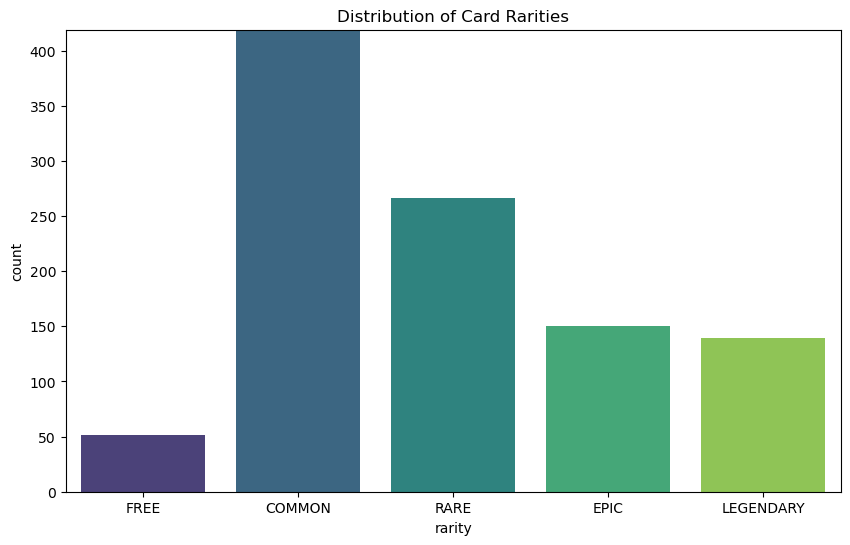

In [25]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rarity', data=cards_cleaned, palette='viridis', order=rarity_order)

# Adjust the y-axis limits to make the bars appear even
plt.ylim(0, cards_cleaned['rarity'].value_counts().max() + 1)

plt.title('Distribution of Card Rarities')
plt.show()

Most of the cards are common or basic (free). Legendary cards are very rare and harder to get.

In [26]:
# undestanding patern of relationship

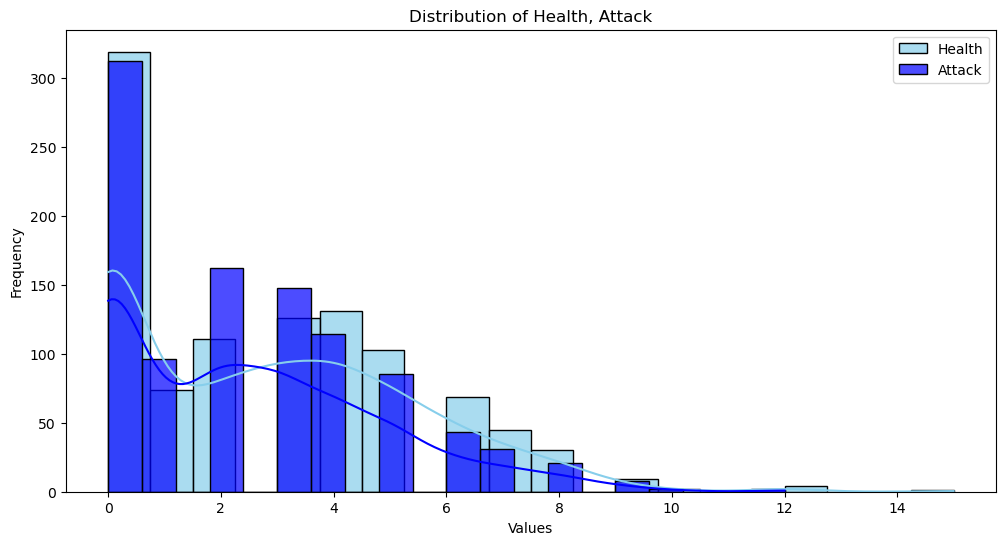

In [27]:
# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot the distribution of health with wider bins
sns.histplot(cards_cleaned['health'].dropna(), bins=20, kde=True, color='skyblue', label='Health', alpha=0.7)

# Plot the distribution of attack with wider bins
sns.histplot(cards_cleaned['attack'].dropna(), bins=20, kde=True, color='blue', label='Attack', alpha=0.7)


# Set labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Health, Attack')
plt.legend()

# Show the plot
plt.show()

A lot of cards have just low number of points both for attack and health. Just low number of cards have heigh number of attack and health.

Pie plot for class distribution

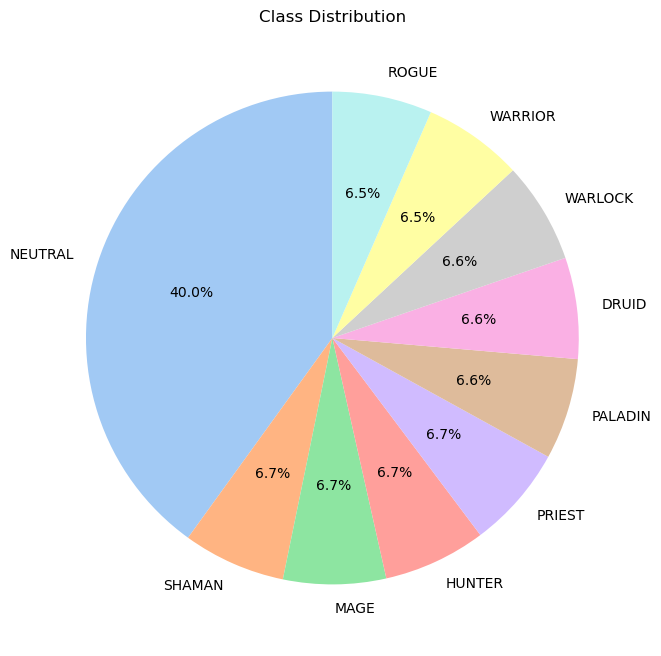

In [28]:
class_distribution = cards_cleaned['playerClass'].value_counts()

# Create a pie plot
plt.figure(figsize=(8, 8))
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Class Distribution')
plt.show()

As we see there are 40 % of cards which every class can use and for each class of the game there is even distrubition of creted cards for every class.

Histogram for Mana cost

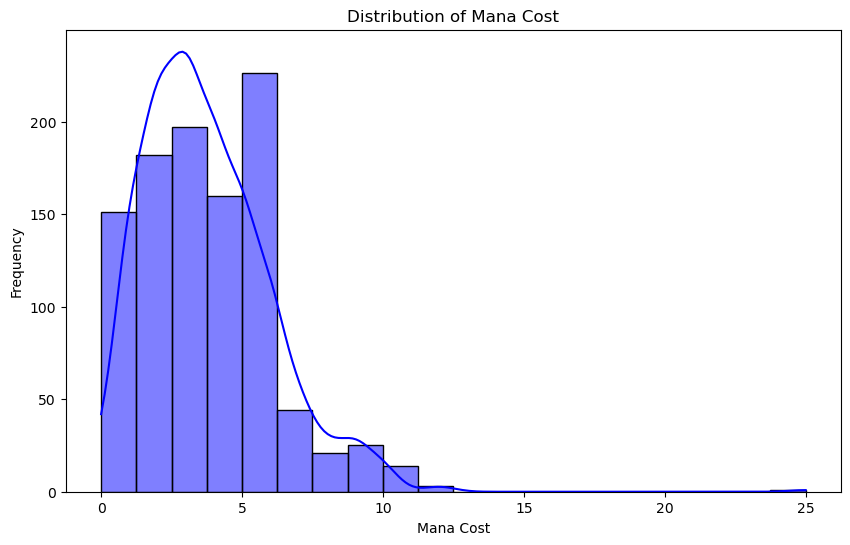

In [29]:
plt.figure(figsize=(10, 6))

# Plot the distribution of mana cost
sns.histplot(cards_cleaned['mana cost'], bins=20, kde=True, color='blue')

# Set labels and title
plt.xlabel('Mana Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Mana Cost')

# Show the plot
plt.show()

From this chart we can see that most of the cards are requiring 3-5 mana of the player. From point of 6 it is dropping a lot. There are also some outliers as we can see from the chard but the usually had some other requirements that can drop use of mana for player.

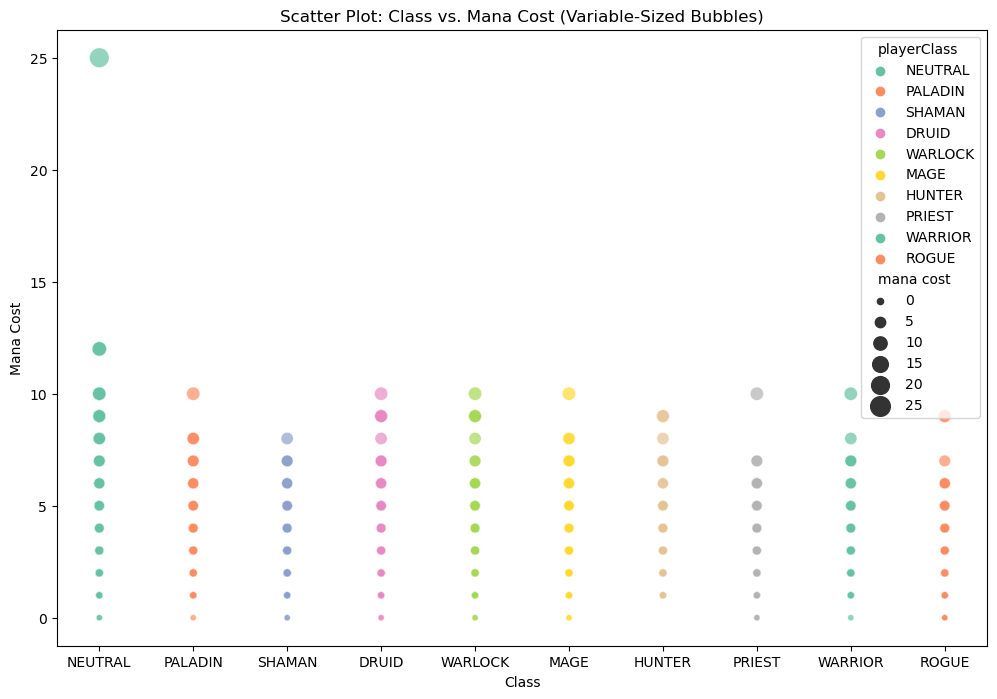

In [30]:
plt.figure(figsize=(12, 8))

# Scatter plot for classId and cost with variable-sized bubbles
sns.scatterplot(x='playerClass', y='mana cost', data=cards_cleaned, hue='playerClass', palette='Set2', size='mana cost', sizes=(20, 200), alpha=0.7)

# Set labels and title
plt.xlabel('Class')
plt.ylabel('Mana Cost')
plt.title('Scatter Plot: Class vs. Mana Cost (Variable-Sized Bubbles)')

# Show the plot
plt.show()

In [31]:
# how spells, weapons and meanions are distuributed by classes

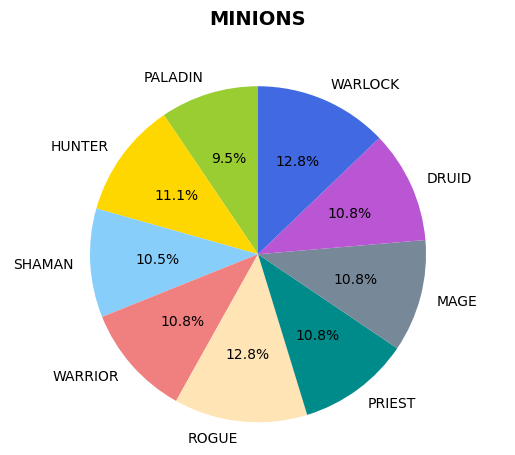

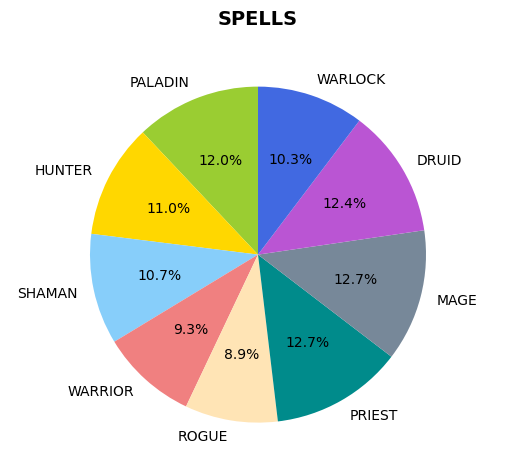

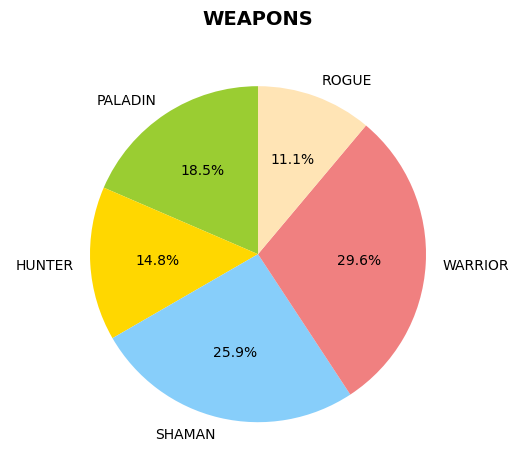

In [32]:
plot_data = dict()
a = cards_cleaned.groupby([ 'playerClass','type']).size()
for pl_class in set(cards_cleaned['playerClass']):
    weapons = a[pl_class]['WEAPON'] if 'WEAPON' in a[pl_class] else 0
    spell = a[pl_class]['SPELL'] if 'SPELL' in a[pl_class] else 0
    minion = a[pl_class]['MINION'] if 'MINION' in a[pl_class] else 0
    if pl_class != 'NEUTRAL':
        plot_data[pl_class] = (minion, spell, weapons)

labels = ['PALADIN', 'HUNTER', 'SHAMAN', 'WARRIOR', 'ROGUE', 'PRIEST', 'MAGE', 'DRUID', 'WARLOCK']
minions_sizes = [plot_data[x][0] for x in labels]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'moccasin', 'darkcyan', 'lightslategrey', 'mediumorchid', 'royalblue']

plt.figure(0)
plt.pie(minions_sizes, labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=90, colors=colors )
plt.title('MINIONS', fontsize=14, fontweight='bold', y = 1.1)
plt.axis('equal')

plt.figure(1)
plt.title('SPELLS', fontsize=14, fontweight='bold', y = 1.1)
plt.pie([plot_data[x][1] for x in labels], labels=labels,
        autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
plt.axis('equal');

plt.figure(2)
plt.title('WEAPONS', fontsize=14, fontweight='bold', y = 1.1)
weapon_labels = ['PALADIN', 'HUNTER', 'SHAMAN', 'WARRIOR', 'ROGUE']
plt.pie([plot_data[x][2] for x in weapon_labels], labels=weapon_labels,
        autopct='%1.1f%%', shadow=False, startangle=90, colors=colors)
plt.axis('equal');

From this chart we can see that every class has equal distribution of weapon, spells and minions for each class.

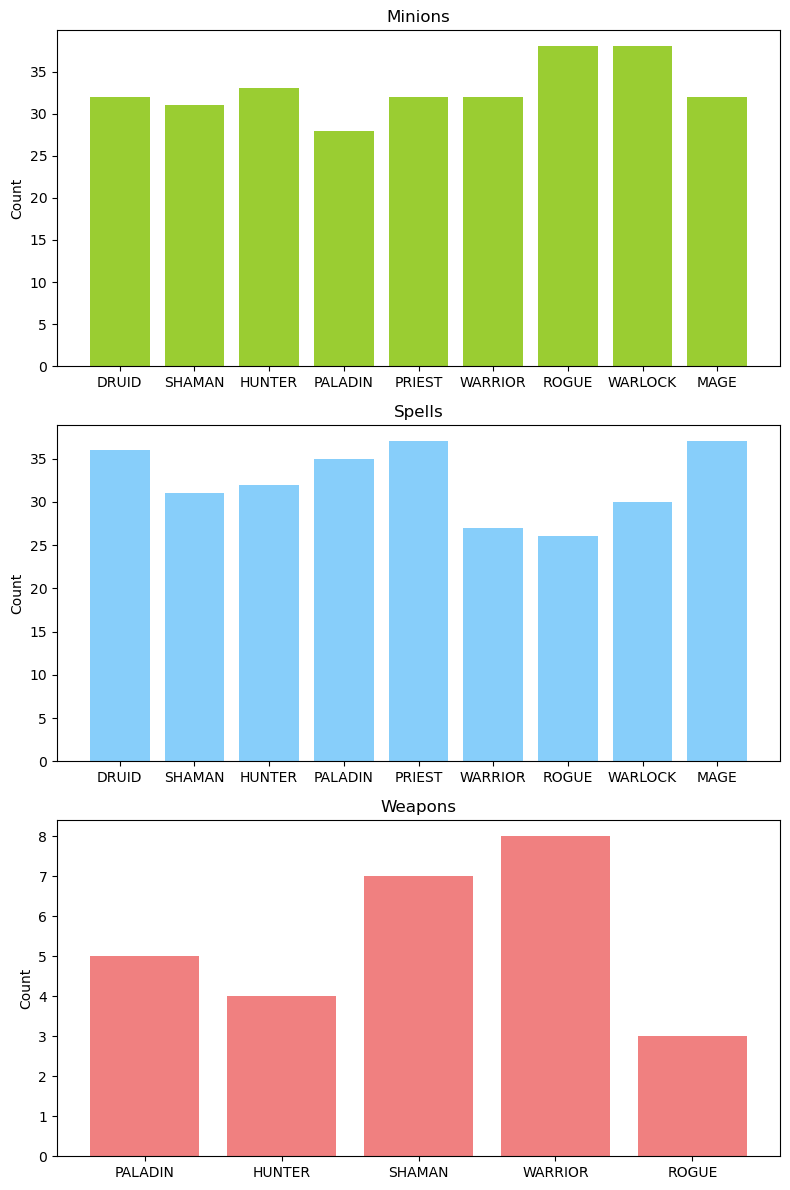

In [33]:
# Assuming 'plot_data' contains the data as described in your code snippet
fig, axs = plt.subplots(3, 1, figsize=(8, 12))  # Creating subplots for minions, spells, and weapons

# Plot for minions
axs[0].bar(plot_data.keys(), [data[0] for data in plot_data.values()], color='yellowgreen')
axs[0].set_title('Minions')
axs[0].set_ylabel('Count')

# Plot for spells
axs[1].bar(plot_data.keys(), [data[1] for data in plot_data.values()], color='lightskyblue')
axs[1].set_title('Spells')
axs[1].set_ylabel('Count')

# Plot for weapons
weapon_labels = ['PALADIN', 'HUNTER', 'SHAMAN', 'WARRIOR', 'ROGUE']
axs[2].bar(weapon_labels, [plot_data[label][2] for label in weapon_labels], color='lightcoral')
axs[2].set_title('Weapons')
axs[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

Creating requirements file

In [34]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
